<a href="https://colab.research.google.com/github/katyreena/MAI/blob/main/AI/Homework_2023%20/OpenCV/OpenCV_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание 1
В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.

Пример результата с подсказкой содержит изображение railway_result.png. Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.


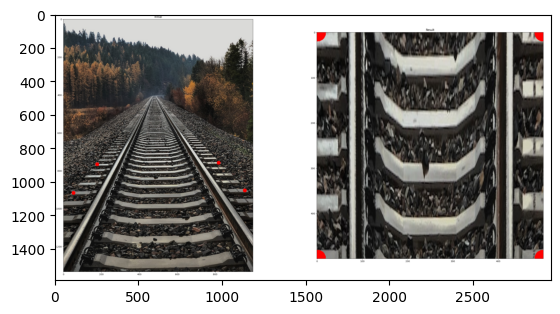

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cv.cvtColor(cv.imread("/content/railway_result.png"), cv.COLOR_BGR2RGB))

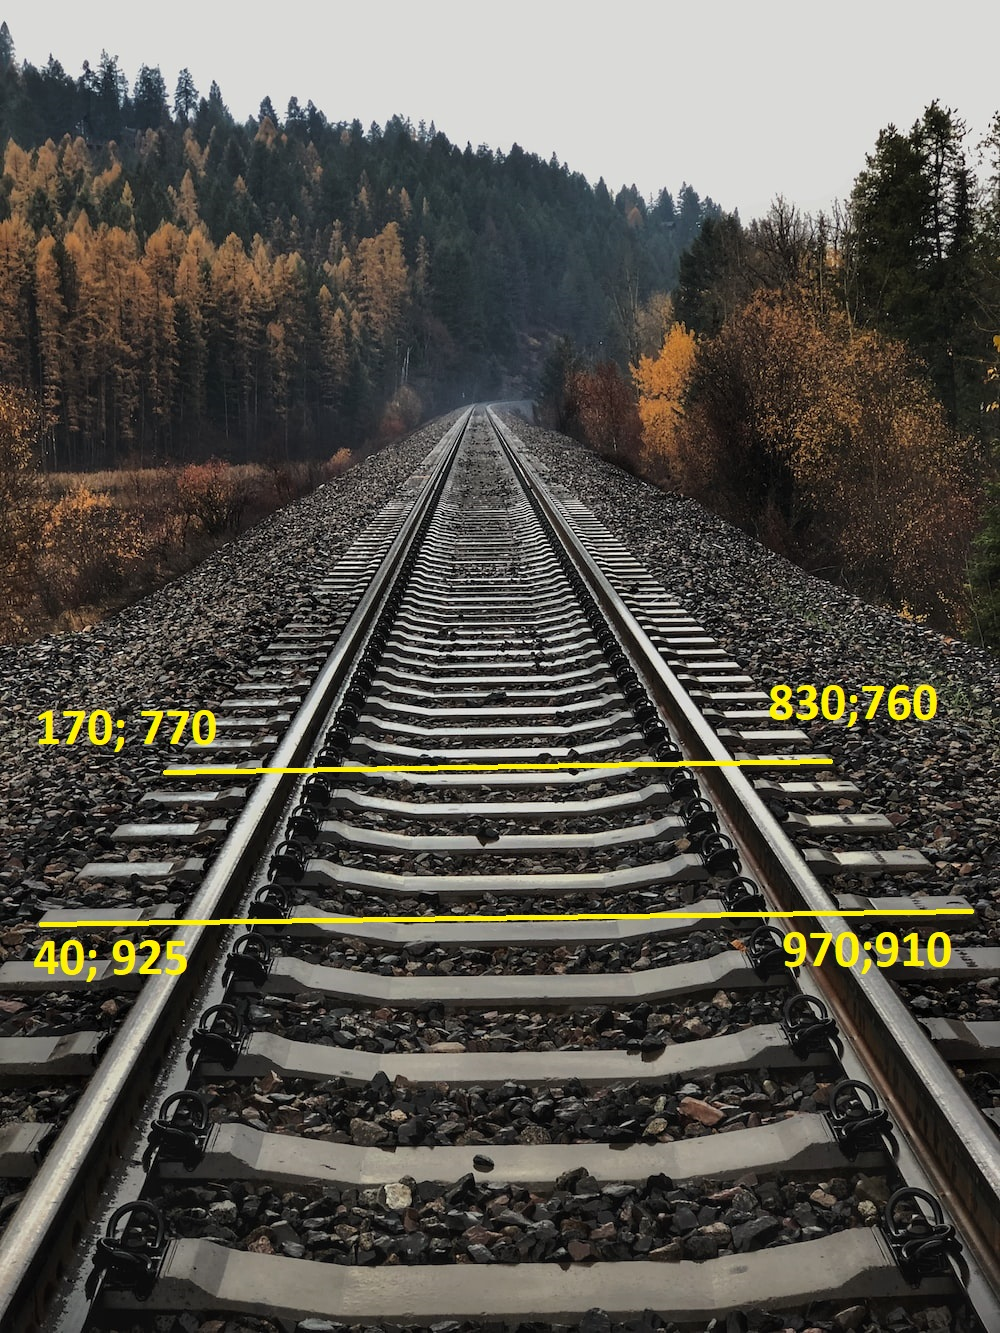

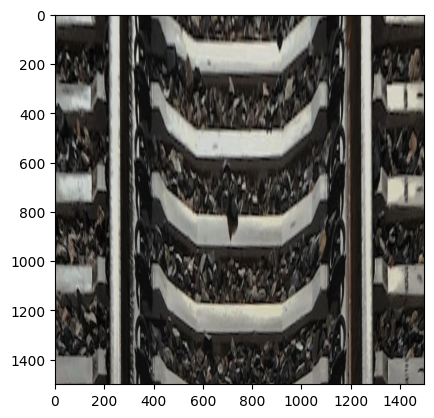

In [ ]:
bgr = cv.imread("/content/railway.jpeg")
image = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)

first = np.float32([
    [40, 925],
    [970, 910],
    [830, 760],
    [170, 770]
])
second = np.float32([
    [0, 1500],
    [1500, 1500],
    [1500, 0],
    [0, 0]
])

perspective = cv.warpPerspective(
    image,
    cv.getPerspectiveTransform(first, second),
    (1500, 1500)
)

plt.imshow(perspective)

##Задание 2:
В папке находится изображение palm.png с пальмой.   Используя классические аффинные преобразования,
необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png


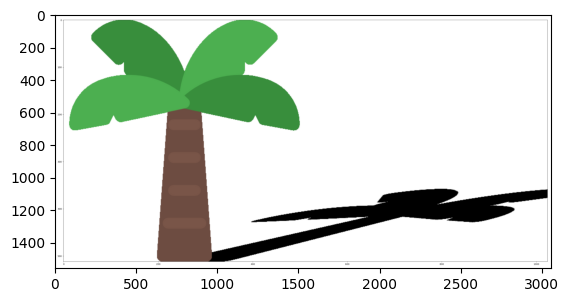

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cv.cvtColor(cv.imread("/content/palm_result.png"), cv.COLOR_BGR2RGB))

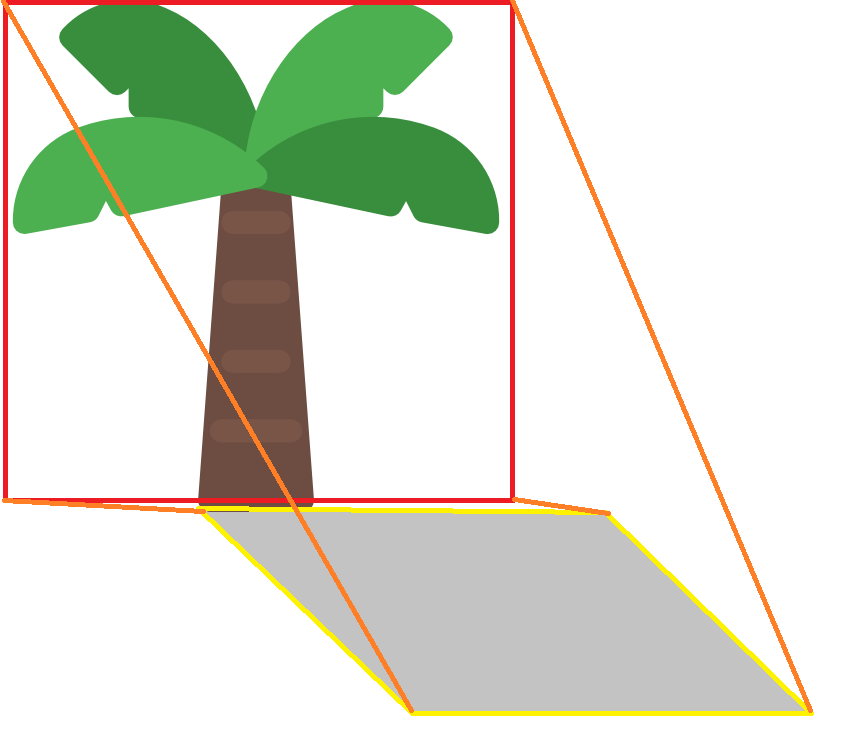

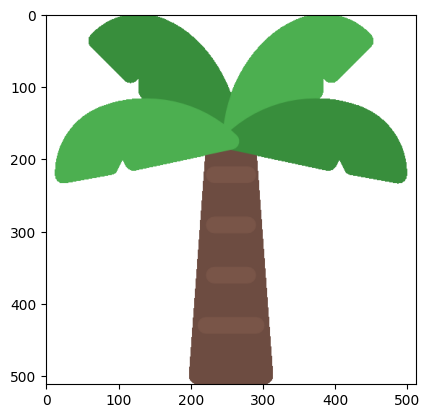

In [ ]:
brg = cv.imread("/content/palm.png")
image = cv.cvtColor(brg, cv.COLOR_BGR2RGB)


plt.imshow(image)

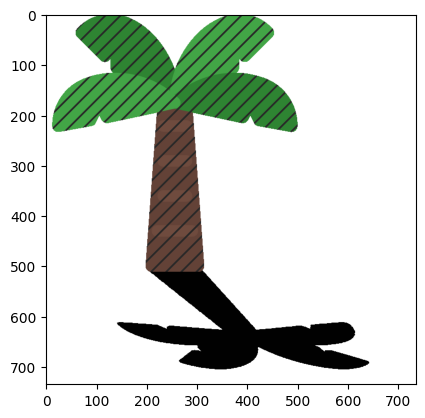

In [ ]:
first = np.float32([
    [0, 512],
    [512, 512],
    [512, 0],
    [0, 0]
])


distX = 140
crossing = 10
second = np.float32([
    [149-distX, 512-crossing],
    [630-distX, 512-crossing],
    [854-distX, 715-crossing],
    [364-distX, 715-crossing],

])

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, threshold = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY_INV)

contours, _ = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

shadow = np.ones((735, 735, 3), dtype=np.uint8) * 255
cv.drawContours(shadow, contours, -1, (1, 1, 1), thickness=cv.FILLED)

shadow = cv.warpPerspective(
    shadow,
    cv.getPerspectiveTransform(first, second),
    (735, 735)
)


stripe_width = 30
spacing = 30
thickness = 2
color = (50, 50, 50)
striped_image = np.copy(image)

for i in range(-height, width, spacing):
    cv.line(striped_image, (width + i, 0), (i, height), color, thickness)

canvas = np.ones((735, 735, 3), dtype=np.uint8) * 255
for i in range(735):
  for j in range(735):
    if i < 512 and j < 512 and (image[i][j] != [255, 255 , 255]).all():
      canvas[i][j] = striped_image[i][j] - [10, 10, 10]
    elif(shadow[i][j] == [1, 1, 1]).all():
      canvas[i][j] = shadow[i][j]


plt.imshow(canvas)


#plt.show()